# Image Classification Using Convolutional Neural Networks on CIFAR-10 Dataset

### Import necessary libraries

In [121]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

###  Load the CIFAR-10 dataset

In [122]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalize the data

In [123]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### One-hot encode the labels

In [124]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Initialize the ImageDataGenerator for data augmentation

In [125]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

### Build the CNN model

In [126]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

### Compile the model

In [127]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model with data augmentation

In [128]:
batch_size = 64
epochs = 10

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 134s 169ms/step - accuracy: 0.2769 - loss: 1.9312 - val_accuracy: 0.5175 - val_loss: 1.3219
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:09 165ms/step - accuracy: 0.4844 - loss: 1.4336

2024-07-18 11:41:14.361477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/david/Desktop/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4844 - loss: 1.4336 - val_accuracy: 0.5168 - val_loss: 1.3258
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 176ms/step - accuracy: 0.4990 - loss: 1.3792 - val_accuracy: 0.5698 - val_loss: 1.2185
Epoch 4/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:24 185ms/step - accuracy: 0.4531 - loss: 1.4825

2024-07-18 11:43:38.304027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4531 - loss: 1.4825 - val_accuracy: 0.5787 - val_loss: 1.1879
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 140s 178ms/step - accuracy: 0.5696 - loss: 1.1990 - val_accuracy: 0.6335 - val_loss: 1.0458
Epoch 6/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:17 176ms/step - accuracy: 0.4531 - loss: 1.2876

2024-07-18 11:46:05.067827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4531 - loss: 1.2876 - val_accuracy: 0.6371 - val_loss: 1.0364
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 144s 183ms/step - accuracy: 0.6132 - loss: 1.0912 - val_accuracy: 0.6865 - val_loss: 0.8883
Epoch 8/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:08 165ms/step - accuracy: 0.5625 - loss: 1.0991

2024-07-18 11:48:35.845947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5625 - loss: 1.0991 - val_accuracy: 0.6872 - val_loss: 0.8911
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.6395 - loss: 1.0232 - val_accuracy: 0.7098 - val_loss: 0.8147
Epoch 10/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:16 175ms/step - accuracy: 0.5625 - loss: 0.9623

2024-07-18 11:51:11.269030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5625 - loss: 0.9623 - val_accuracy: 0.7096 - val_loss: 0.8228


### Step 5: Evaluate and Save the Model

In [129]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
model.save('cifar10_cnn_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7120 - loss: 0.8135


Test Accuracy: 0.7095999717712402


### Step 6: Load the Model and Make Predictions on New Images
### Define the CIFAR-10 classes

In [130]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to load and preprocess a new image

In [131]:
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(32, 32))
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

### Load the saved model

In [177]:
model = load_model('cifar10_cnn_model.h5')

### Paths to the images

In [196]:
img_path1 = '/Users/david/desktop/notebooks/images/ship.jpg'
img_path2 = '/Users/david/desktop/notebooks/images/bird.jpg'
img_path3 = '/Users/david/desktop/notebooks/images/plane.jpg'
img_path4 = '/Users/david/desktop/notebooks/images/truck.jpg'
img_path5 = '/Users/david/desktop/notebooks/images/deer.jpg'
img_path6 = '/Users/david/desktop/notebooks/images/cat.jpg'
img_path7 = '/Users/david/desktop/notebooks/images/dog.jpg'
img_path8 = '/Users/david/desktop/notebooks/images/frog.jpg'

In [198]:
images = [img_path1, img_path2, img_path3, img_path4, img_path5, img_path6, img_path7, img_path8]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


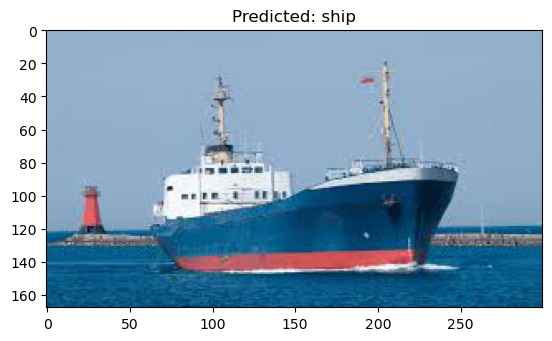

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


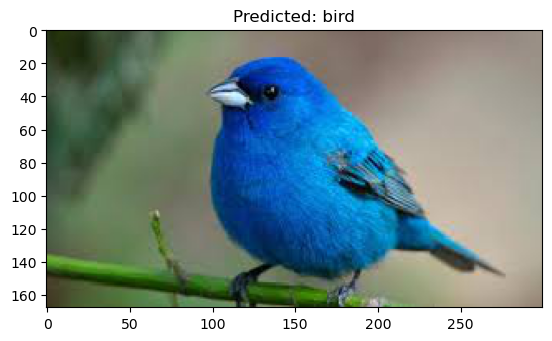

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


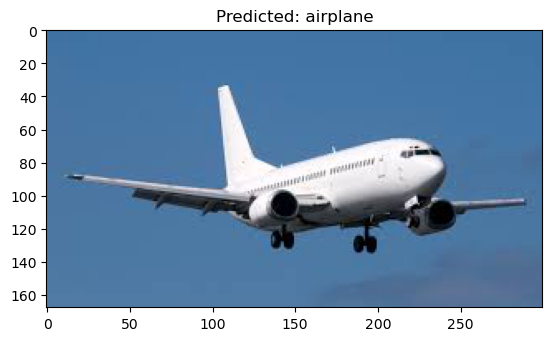

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


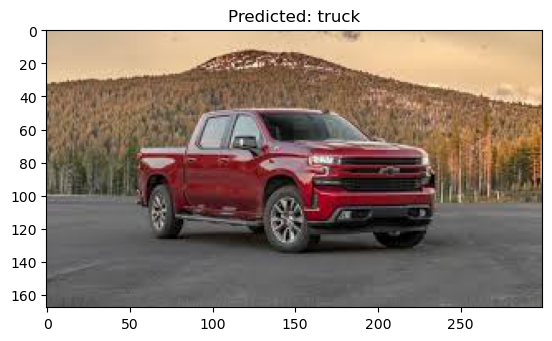

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


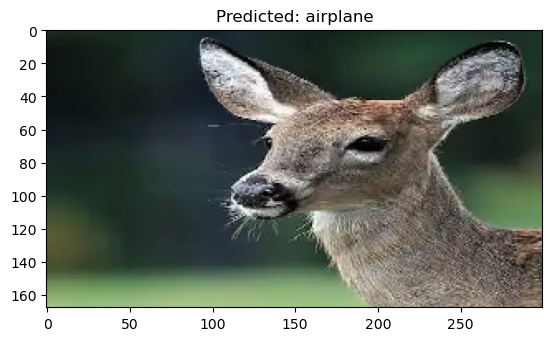

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


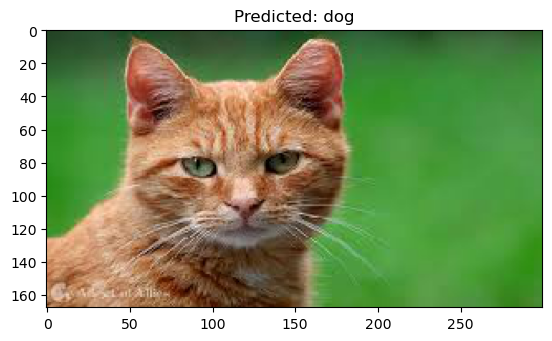

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


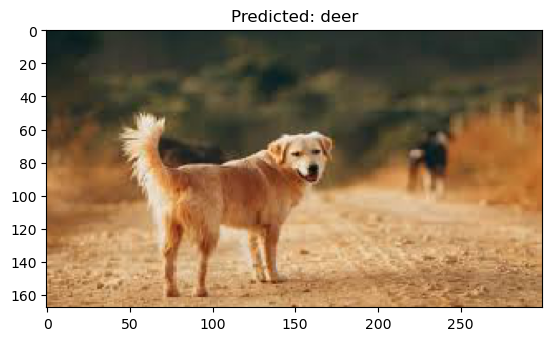

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


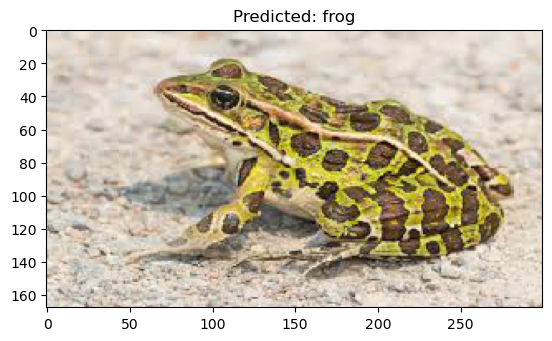

In [199]:
for imge_path in images:
    # Preprocess the imag
    img_array = load_and_preprocess_image(imge_path)

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = cifar10_classes[np.argmax(prediction)]

    # Display the image
    img = load_img(imge_path, target_size=(168, 300))
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.show()